In [1]:
from matplotlib import animation
from from_wave import *

save_path = "../plots"

Standard animation

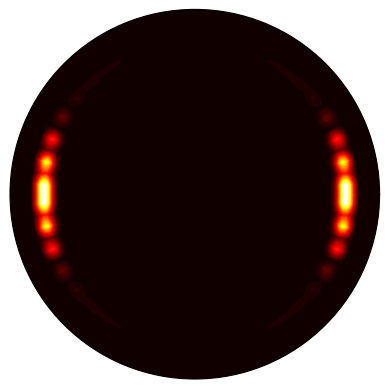

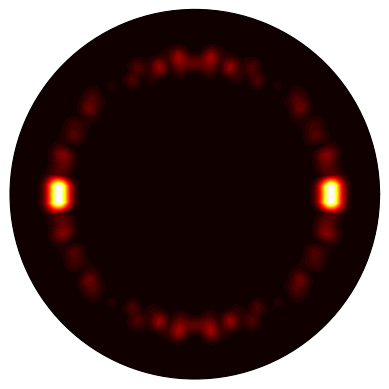

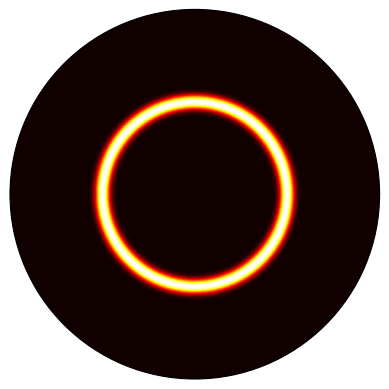

In [13]:
anim = wave_animation("hyq_0.5")
anim.save(f'{save_path}/hyq_0.5_wave_animation.gif', writer="pillow", fps=30)

anim = wave_animation("hyq_0.1")
anim.save(f'{save_path}/hyq_0.1_wave_animation.gif', writer="pillow", fps=30)

anim = wave_animation("hyq_0.05")
anim.save(f'{save_path}/hyq_0.05_wave_animation.gif', writer="pillow", fps=30)

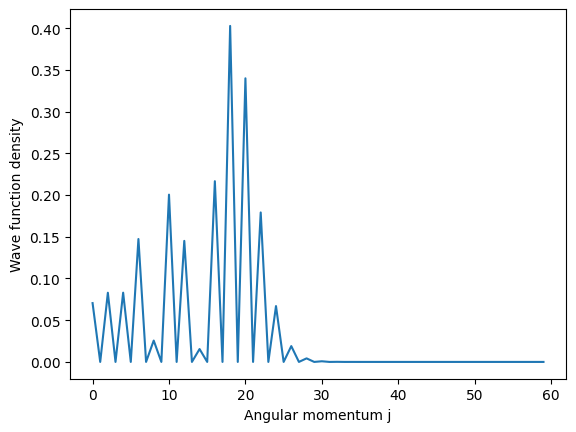

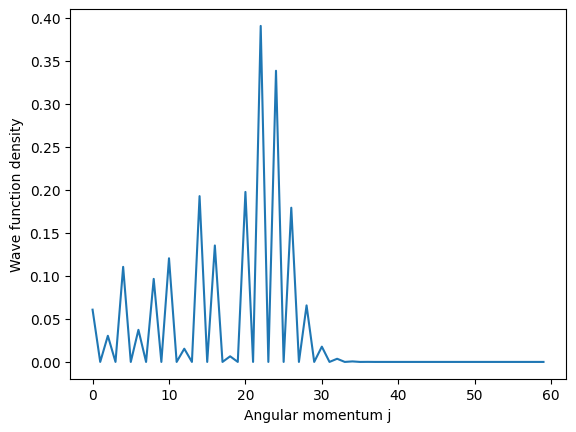

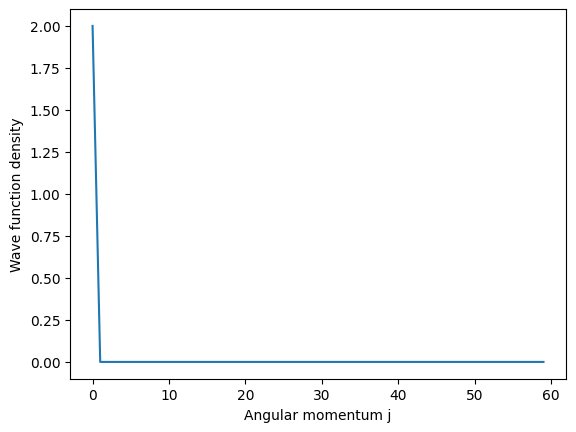

In [8]:
anim = angular_animation("hyq_0.5")
anim.save(f'{save_path}/hyq_0.5_angular_animation.gif', writer="pillow", fps=30)

anim = angular_animation("hyq_0.1")
anim.save(f'{save_path}/hyq_0.1_angular_animation.gif', writer="pillow", fps=30)

anim = angular_animation("hyq_0.05")
anim.save(f'{save_path}/hyq_0.05_angular_animation.gif', writer="pillow", fps=30)

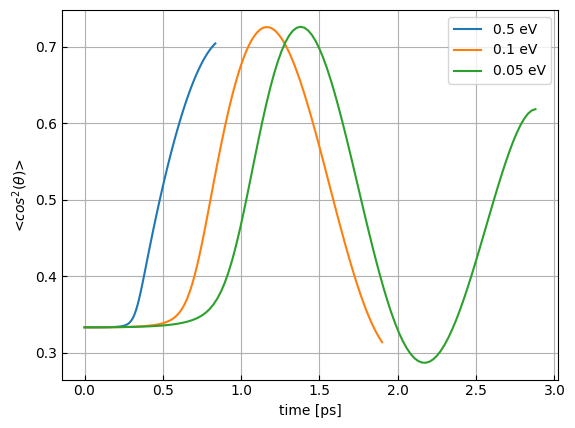

In [2]:
fig, ax = alignements(["hyq_0.5", "hyq_0.1", "hyq_0.05"])
ax.legend(["0.5 eV", "0.1 eV", "0.05 eV"])
fig.savefig(f"{save_path}/alignement_hyq.pdf")

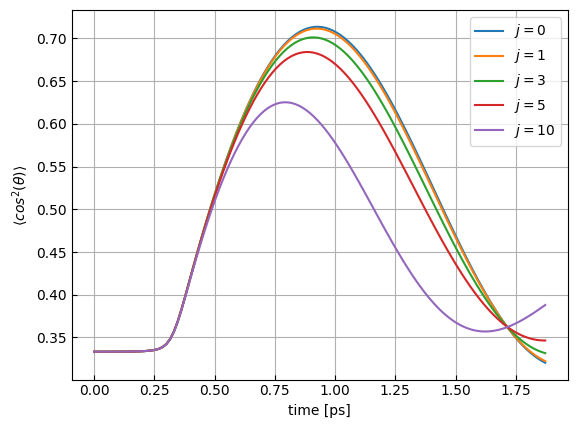

In [23]:
fig, ax = alignements(f"hyq", [0, 1, 3, 5, 10])
ax.legend()
pass

# Comparison quasi-classical

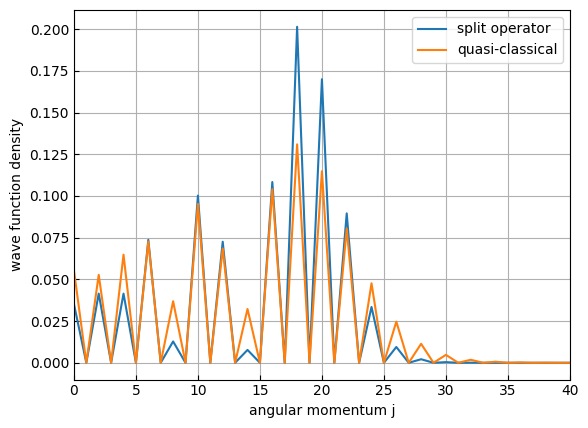

In [21]:
path = "../data/"

wave = np.load(f'{path}/hyq_0_0_angular_animation.npy')
l = np.load(f'{path}/hyq_0_0_angular_animation_angular_momentum_grid.npy')

qc = np.load(f"{path}/HYQ_qqc_angular.npz")
wave_qc = qc.get('arr_1')[-1, :]
wave_qc = np.abs(wave_qc)
wave_qc /= np.sum(wave_qc)
qc.close()

fig, ax = plt.subplots()
ax.grid()
ax.tick_params(which='both', direction="in")
ax.set_xlabel('angular momentum j')
ax.set_ylabel("wave function density")

ax.plot(wave[:, -1], label="split operator")
ax.plot(wave_qc, label="quasi-classical")
ax.set_xlim(0, 40)
ax.legend()
pass

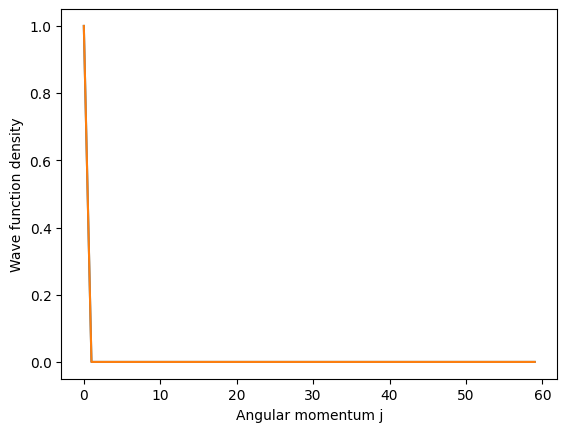

In [18]:
path = "../data/"

wave = np.load(f'{path}/hyq_0_0_angular_animation.npy')
l = np.load(f'{path}/hyq_0_0_angular_animation_angular_momentum_grid.npy')
qc = np.load(f"{path}/HYQ_angular_qc.npy")

fig, ax = plt.subplots()

def animate(i):
    qc_wave = np.abs(qc[i, 0:60])
    qc_wave /= np.sum(qc_wave)

    ax.clear()
    ax.plot(l, wave[:, i], label="split operator")
    ax.plot(l, qc_wave, label="quasi-classical")

    ax.set_xlabel('Angular momentum j')
    ax.set_ylabel('Wave function density')

anim = animation.FuncAnimation(fig, animate, interval=60, frames=wave.shape[1], blit=False)
anim.save(f'{save_path}/hyq_comparison_angular_animation.gif', writer="pillow", fps=30)
